In [43]:
import pandas as pd
import numpy as np
import re 
import random
import base64
from io import BytesIO

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import requests

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Songs_Dataset_Final.csv',encoding='utf-8')

In [3]:
df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis =1 , inplace = True)

In [4]:
df

valence  year  acousticness                      artists  \
0         0.177  1989        0.5680                      ['조정현']   
1         0.352  1992        0.3810                       ['黑豹']   
2         0.458  1963        0.9870                      ['黃國隆']   
3         0.796  1963        0.8520               ['黃國隆', '王秋玉']   
4         0.704  1963        0.7710                      ['黃國隆']   
...         ...   ...           ...                          ...   
156405    0.620  1999        0.0826      ['"Weird Al" Yankovic']   
156406    0.974  1986        0.2340      ['"Weird Al" Yankovic']   
156407    0.546  2003        0.1420      ['"Weird Al" Yankovic']   
156408    0.966  1988        0.0431      ['"Weird Al" Yankovic']   
156409    0.902  1925        0.9270  ['"Test for Victor Young"']   

        danceability  duration_ms  energy  explicit                      id  \
0              0.447       237688  0.2150         0  2ghebdwe2pNXT4eL34T7pW   
1              0.353       316160  0.6860         0  3KIuCzckjdeeVuswPo20mC   
2              0.241       193480  0.0437         0  4prhqrLXYMjHJ6vpRAlasx   
3              0.711       145720  0.1110         0  5xFXTvnEe03SyvFpo6pEaE   
4              0.610       208760  0.1750         0  6Pqs2suXEqCGx7Lxg5dlrB   
...              ...          ...     ...       ...                     ...   
156405         0.618       682947  0.7680         0  2Ec0liSMY2h4XORHyzKCmY   
156406         0.776       230667  0.6050         0  2zMUYAHJfDU5MKqoCusTwo   
156407         0.740       219960  0.4920         0  1Yd0HypJ0bzilJS9MBztZZ   
156408         0.826       217387  0.6940         0  2CstSu0GDI4dUFtE3VdubW   
156409         0.734       175693  0.4740         0  6ivMXI6YMOPvsiUyTDIV7b   

        instrumentalness  ...  popularity  release_date  speechiness    tempo  \
0               0.000001  ...          31    1989-06-15       0.0272   71.979   
1               0.000000  ...          35    1992-12-22       0.0395  200.341   
2               0.000453  ...          23    1963-05-28       0.0443   85.936   
3               0.000000  ...          23    1963-05-28       0.0697  124.273   
4               0.000000  ...          23    1963-05-28       0.0419  124.662   
...                  ...  ...         ...           ...          ...      ...   
156405          0.000000  ...          38    1999-06-29       0.3200  186.599   
156406          0.000000  ...          24    1986-10-21       0.0326  116.009   
156407          0.000000  ...          39    2003-05-20       0.0597   82.033   
156408          0.000000  ...          35    1988-01-01       0.0614  150.018   
156409          0.076200  ...           3          1925       0.2560  132.788   

                     artists_upd_v1             artists_upd_v2  \
0                           ['조정현']                         []   
1                            ['黑豹']                         []   
2                           ['黃國隆']                         []   
3                    ['黃國隆', '王秋玉']                         []   
4                           ['黃國隆']                         []   
...                             ...                        ...   
156405      ['"Weird Al" Yankovic']               ['Weird Al']   
156406      ['"Weird Al" Yankovic']               ['Weird Al']   
156407      ['"Weird Al" Yankovic']               ['Weird Al']   
156408      ['"Weird Al" Yankovic']               ['Weird Al']   
156409  ['"Test for Victor Young"']  ['Test for Victor Young']   

                        artists_upd  \
0                           ['조정현']   
1                            ['黑豹']   
2                           ['黃國隆']   
3                    ['黃國隆', '王秋玉']   
4                           ['黃國隆']   
...                             ...   
156405      ['"Weird Al" Yankovic']   
156406      ['"Weird Al" Yankovic']   
156407      ['"Weird Al" Yankovic']   
156408      ['"Weird Al" Yankovic']   
156409  ['"Test for Victor Young"']   

       

In [9]:
df.isnull().sum()

valence                     0
year                        0
acousticness                0
artists                     0
danceability                0
duration_ms                 0
energy                      0
explicit                    0
id                          0
instrumentalness            0
key                         0
liveness                    0
loudness                    0
mode                        0
name                        0
popularity                  0
release_date                0
speechiness                 0
tempo                       0
artists_upd_v1              0
artists_upd_v2              0
artists_upd                 0
artists_song                0
consolidates_genre_lists    0
Mood                        0
dtype: int64

In [22]:
def ChooseDataset(x):
    if x == "Fear":
        return df[df['Mood'].isin(['Happy', 'Calm'])]
    if x == "Happy":
        return df[df['Mood'].isin(['Energetic', 'Happy', 'Calm'])]
    if x == "Sad":
        return df[df['Mood'].isin(['Sad', 'Calm'])]
    if x == "Surprise":
        return df[df['Mood'].isin(['Calm'])]
    return df

In [13]:
df.columns

Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo', 'artists_upd_v1', 'artists_upd_v2',
       'artists_upd', 'artists_song', 'consolidates_genre_lists', 'Mood'],
      dtype='object')

In [7]:
def visualize_songs(recommended_songs):
    for _, song in recommended_songs.iterrows():
        track_info = spotify.search(q='track:"{}" artist:"{}"'.format(song['name'], song['artists']), type='track')
        if track_info['tracks']['items']:
            image_url = track_info['tracks']['items'][0]['album']['images'][0]['url']
            song_url = track_info['tracks']['items'][0]['external_urls']['spotify']
            response = requests.get(image_url)
            image = Image.open(BytesIO(response.content))
            plt.imshow(image)
            plt.title(song['name'] + ' - ' + song['artists'])
            plt.axis('off')
            plt.show()
            print("Song URL: ",song_url)

In [48]:
def display_cover_image(song_id, client_id, client_secret):
    url = f"https://api.spotify.com/v1/tracks/{song_id}"
    client_credentials = f"{client_id}:{client_secret}"
    encoded_credentials = base64.b64encode(client_credentials.encode()).decode()
    headers = {
        "Authorization": f"Basic {encoded_credentials}"
    }
    data = {
        "grant_type": "client_credentials"
    }
    token_url = "https://accounts.spotify.com/api/token"
    token_response = requests.post(token_url, headers=headers, data=data)
    if token_response.status_code == 200:
        access_token = token_response.json()['access_token']
        headers = {
            "Authorization": f"Bearer {access_token}"
        }
        response = requests.get(url, headers=headers)
        if response.status_code == 200:
            data = response.json()
            image_url = data['album']['images'][0]['url']
            image_data = requests.get(image_url).content
            image_file = BytesIO(image_data)
            img = plt.imread(image_file, format='jpeg')
            plt.imshow(img)
            plt.axis('off')  
            plt.show()
        else:
            print("Failed to retrieve image.")
    else:
        print("Failed to obtain access token.")

In [45]:
def songs_output(finalEmotion):
    dataset = ChooseDataset(finalEmotion)
    random_songs = dataset.sample(n=20)
    for index, song in random_songs.iterrows():
        print("Song Name:", song['name'])
        print("Spotify URL:", f"https://open.spotify.com/track/{song['id']}")
        display_cover_image(song['id'],'bdb135bd934845888ebbca4503dafa52','1c4104ba0ef147a09e198023b3d340a4') 
        print("\n")

Song Name: Daft Pretty Boys
Spotify URL: https://open.spotify.com/track/41d2Q6DHcM20OdzynkRtvf


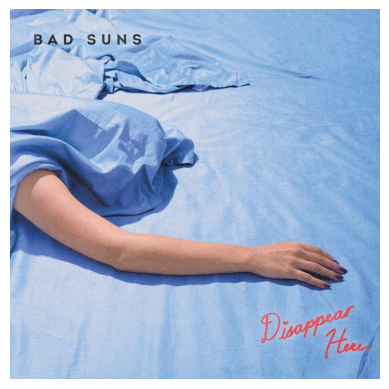



Song Name: Grand Canyon Suite: IV. Sunset
Spotify URL: https://open.spotify.com/track/1dWa3hnkUjVnNIYrE2rNPg


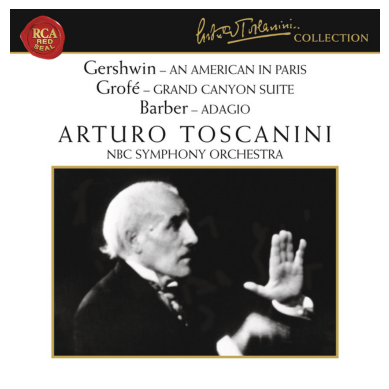



Song Name: Cumberland Gap
Spotify URL: https://open.spotify.com/track/2IGLgLzFxFUiDnGjshugWZ


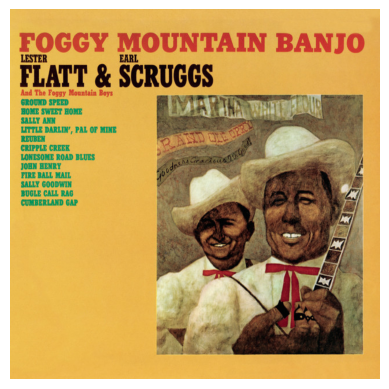



Song Name: EX
Spotify URL: https://open.spotify.com/track/47cQCF21TczFSmGfpd7c07


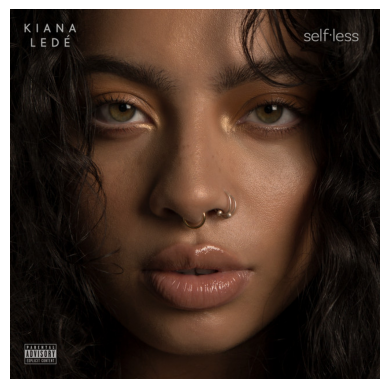



Song Name: Once In A While
Spotify URL: https://open.spotify.com/track/1cPS79seWvfb9dH5PQ3CXq


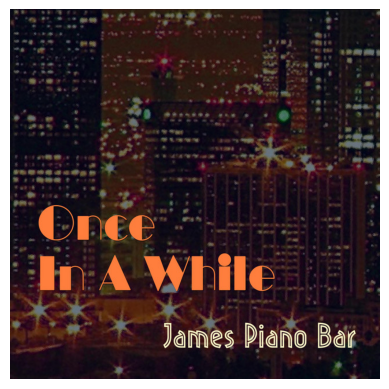



Song Name: Vivaldi: Violin Concerto in F Minor, RV 297 "L'inverno" (No. 4 from "Il cimento dell'armonia e dell'inventione", Op. 8): II. Largo
Spotify URL: https://open.spotify.com/track/4LTGZ03qAt7ZQ1Pqk97vgZ


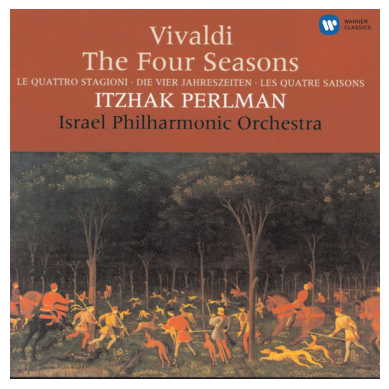



Song Name: Daydreams About Night Things
Spotify URL: https://open.spotify.com/track/1PTngmREtR0P0YMLdqVWBj


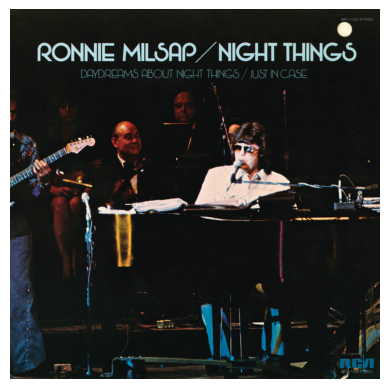



Song Name: Cello Concerto in A Minor, Op. 129: I. Nicht zu schnell
Spotify URL: https://open.spotify.com/track/2TrTQKJt3y3AQhpf2J5CkT


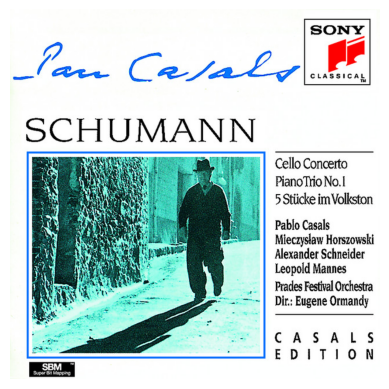



Song Name: ...but home is nowhere
Spotify URL: https://open.spotify.com/track/49aVAeHo288tTTbVGu6xGa


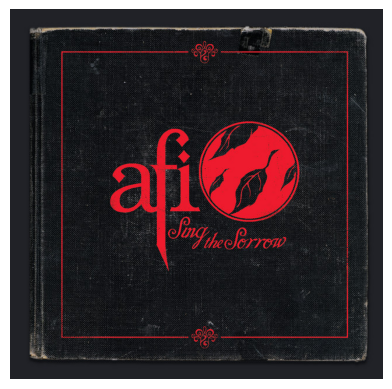



Song Name: 24 Préludes, Op. 28: Prélude No. 17 in A-Flat Major
Spotify URL: https://open.spotify.com/track/3btMaYP8cUk5z6Mr5x88wZ


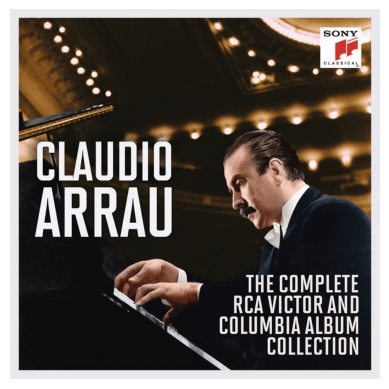



Song Name: Country Honk
Spotify URL: https://open.spotify.com/track/6zD3VBPn2VNDdmLEg0coPt


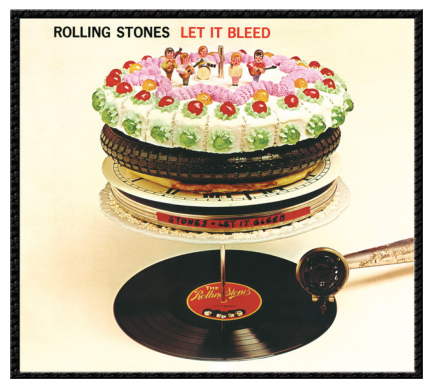



Song Name: El Carita
Spotify URL: https://open.spotify.com/track/11S92JX3sVCPsbjo0xqeZX


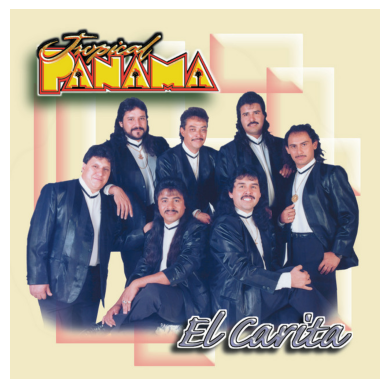



Song Name: House Without Windows
Spotify URL: https://open.spotify.com/track/0pjnoDIxT234ZzElKdveul


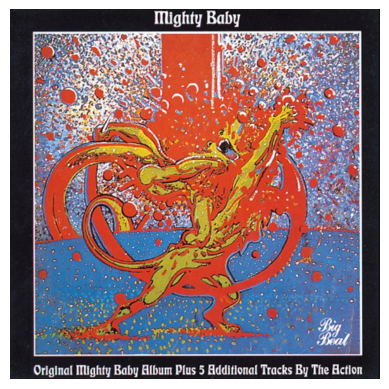



Song Name: Here's to Us
Spotify URL: https://open.spotify.com/track/0a5UnIvDUBzqwUduJsouRy


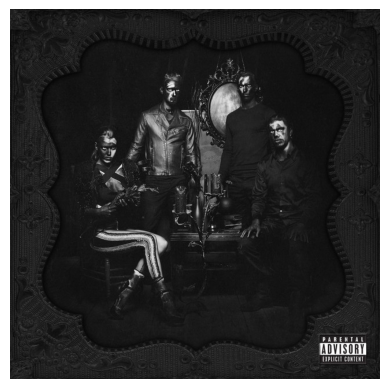



Song Name: War of Change
Spotify URL: https://open.spotify.com/track/6jg3Om6ZBMKlylforWGPEC


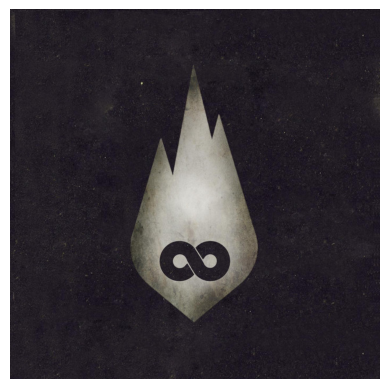



Song Name: El Tarasco
Spotify URL: https://open.spotify.com/track/2PsIEl2MF6biKim5ylw3vm


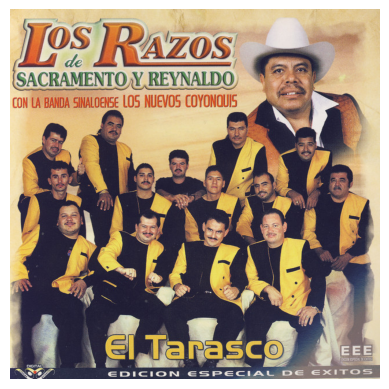



Song Name: Don't Walk Away
Spotify URL: https://open.spotify.com/track/7tsRp7QKUBp6hc9bth0h7x


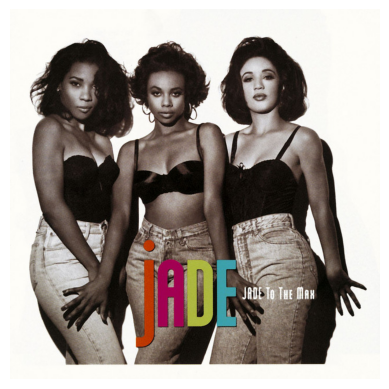



Song Name: Yeah 3x
Spotify URL: https://open.spotify.com/track/2QtxlzvSBONjs1bDC34ixs


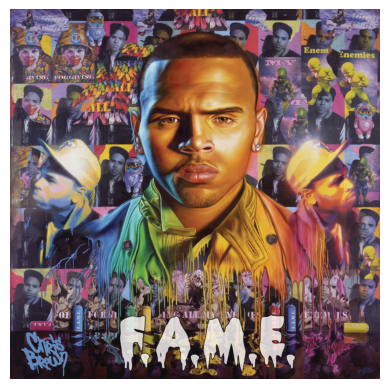



Song Name: I Will Walk With You
Spotify URL: https://open.spotify.com/track/5rMeegCwo4SmMGBdSB13Fu


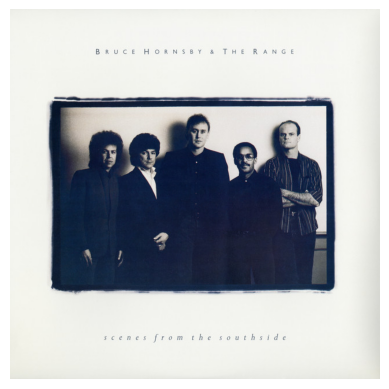



Song Name: This Is Your Night
Spotify URL: https://open.spotify.com/track/5p0rUHicpwMZil8RlNGGth


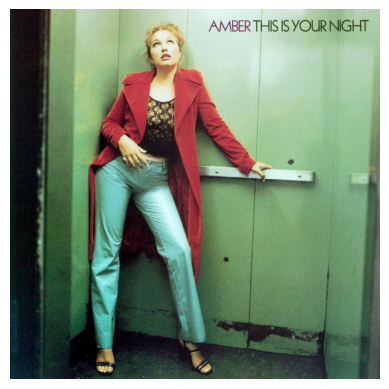

In [47]:
songs_output("Happy")